1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [7]:
import pandas as pd

# 定义数据文件路径
file_path = 'open_rank_20236.csv'  # 请根据实际文件名和路径调整

# 读取数据集
data = pd.read_csv(file_path)

# 查看数据集的前几行和列名（可选）
print(data.head())
print(data.columns.tolist())

# 获取排名前100的项目
top_100_projects = data.nsmallest(100, 'rank')  # 使用 nsmallest 获取前100名

# 计算 value 的最大值、最小值、均值和中位数
value_max = top_100_projects['value'].max()
value_min = top_100_projects['value'].min()
value_mean = top_100_projects['value'].mean()
value_median = top_100_projects['value'].median()

# 输出结果
print(f"最大值: {value_max}")
print(f"最小值: {value_min}")
print(f"均值: {value_mean}")
print(f"中位数: {value_median}")

                  item  rank    value  rankDelta  valueDelta
0  home-assistant/core     1  1394.45          0      -23.01
1     microsoft/vscode     2  1334.48          0      -36.42
2        NixOS/nixpkgs     3  1240.31          0       -0.31
3      flutter/flutter     4   886.61          0      -13.74
4      pytorch/pytorch     5   803.78          1        8.29
['item', 'rank', 'value', 'rankDelta', 'valueDelta']
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [11]:
import pandas as pd

# 定义数据文件路径
file_path = 'activity_2022.csv'  # 请根据实际文件名和路径调整

# 读取数据集
data = pd.read_csv(file_path)

# 查看数据集的前几行和列名（可选）
print(data.head())
print(data.columns.tolist())

# 计算每个项目的增长率
growth_rates = []

# 遍历每个项目，计算各季度的增长率
for index, row in data.iterrows():
    repo_growth = []
    for i in range(1, len(row[1:])):  # 从第二列开始
        prev_value = row[i]
        current_value = row[i + 1]
        if prev_value != 0:
            growth_rate = (current_value - prev_value) / prev_value * 100
            repo_growth.append(growth_rate)
        else:
            repo_growth.append(None)  # 避免除以零
    growth_rates.append(repo_growth)

# 将增长率添加到 DataFrame
growth_df = pd.DataFrame(growth_rates, columns=[f'growth_rate_q{i+1}' for i in range(len(growth_rates[0]))])
data = pd.concat([data, growth_df], axis=1)

# 计算每个项目的平均增长率
data['average_growth_rate'] = data[[f'growth_rate_q{i+1}' for i in range(len(growth_rates[0]))]].mean(axis=1)

# 根据第一个季度的值获取排名前10的项目
top_10_projects = data.nlargest(10, '20221_value')  # 获取 20221_value 列的前10名项目

# 计算平均增长率
average_growth_rate = top_10_projects['average_growth_rate'].mean()

# 输出结果
print(f"美国排名前十项目的平均增长率: {average_growth_rate:.2f}%")

                                     repo  20221_value  20222_value  \
0                MicrosoftDocs/azure-docs      3221.61      3302.85   
1                           NixOS/nixpkgs      4709.28      3957.32   
2                          dotnet/runtime      2600.89      2440.22   
3                          elastic/kibana      2239.42      2304.51   
4  firstcontributions/first-contributions      1861.86      1380.53   

   20223_value  20224_value  20225_value  20226_value  20227_value  \
0      3602.62      3020.43      3139.18      2937.18      2986.11   
1      4152.01      4504.33      4466.66      4039.08      4306.16   
2      2531.65      2396.73      2367.37      2513.15      2651.79   
3      2780.39      2232.96      2451.97      2258.71      2412.21   
4      1439.61      1312.30      1806.75      1677.76      1912.84   

   20228_value  20229_value  202210_value  202211_value  202212_value  
0      3164.88      3326.35       3219.28       3142.08       2520.18  
1      4

C:\Users\22890\AppData\Local\Temp\ipykernel_3904\2411597555.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_value = row[i]
C:\Users\22890\AppData\Local\Temp\ipykernel_3904\2411597555.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_value = row[i + 1]


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [13]:
import pandas as pd

# 定义数据文件路径
china_file_path = 'china_2022.csv'  # 中国开源企业数据
global_file_path = 'global_2022.csv'  # 全球开源企业数据

# 读取数据集
china_data = pd.read_csv(china_file_path)
global_data = pd.read_csv(global_file_path)

# 查看数据集的前几行和列名（可选）
print("中国开源企业数据：")
print(china_data.head())
print(china_data.columns.tolist())

print("\n全球开源企业数据：")
print(global_data.head())
print(global_data.columns.tolist())

# 计算中国企业的统计指标
china_stats = china_data[['value', 'issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull']].describe()
print("\n中国开源企业统计指标：")
print(china_stats)

# 计算全球企业的统计指标
global_stats = global_data[['value', 'issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull']].describe()
print("\n全球开源企业统计指标：")
print(global_stats)

# 比较统计指标
comparison = pd.DataFrame({
    'China': china_stats.mean(),
    'Global': global_stats.mean()
})

# 计算差异
comparison['Difference'] = comparison['China'] - comparison['Global']

print("\n中国与全球开源企业的统计指标比较：")
print(comparison)

中国开源企业数据：
        name  issue_comment  open_issue  open_pull  review_comment  \
0    Alibaba         111972       22397      35266           48412   
1      Baidu          79370       15580      27414           35072   
2  Ant group          83116       15944      17940           20815   
3    PingCAP         167814        8155      23052           60402   
4    Tencent          39949       10162      20777            7650   

   merged_pull  rank      value  rankDelta  valueDelta  
0        26732     1  103368.49          0    21093.11  
1        21680     2   71636.82          0    10032.08  
2        14464     3   61897.32          0     6380.83  
3        18380     4   48527.89          0     2329.36  
4        17725     5   39080.82          0    12565.41  
['name', 'issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']

全球开源企业数据：
        name  issue_comment  open_issue  open_pull  review_comment  \
0  Microsoft    

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

73.91%。

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

77.78%

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

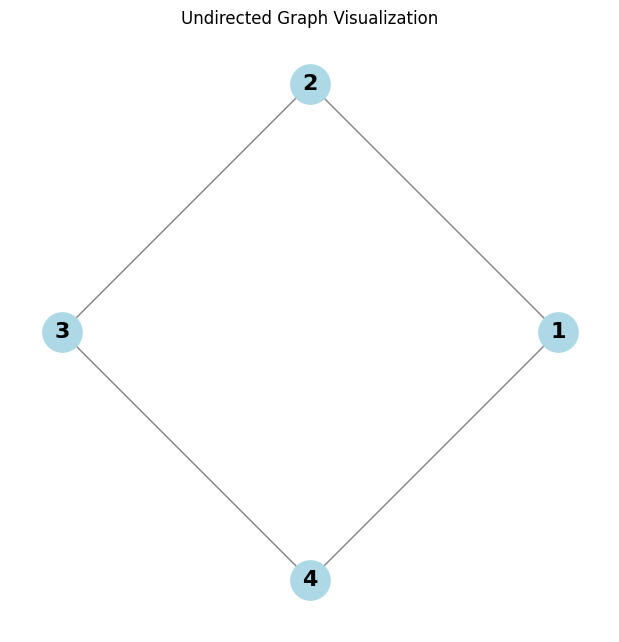

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建图
G = nx.Graph()

# 添加节点
user = [1, 2, 3, 4]
G.add_nodes_from(user)

# 添加边
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(6, 6))
pos = nx.circular_layout(G)  # 使用圆形布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=16, font_color='black', font_weight='bold', edge_color='gray')

# 显示图形
plt.title("Undirected Graph Visualization")
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

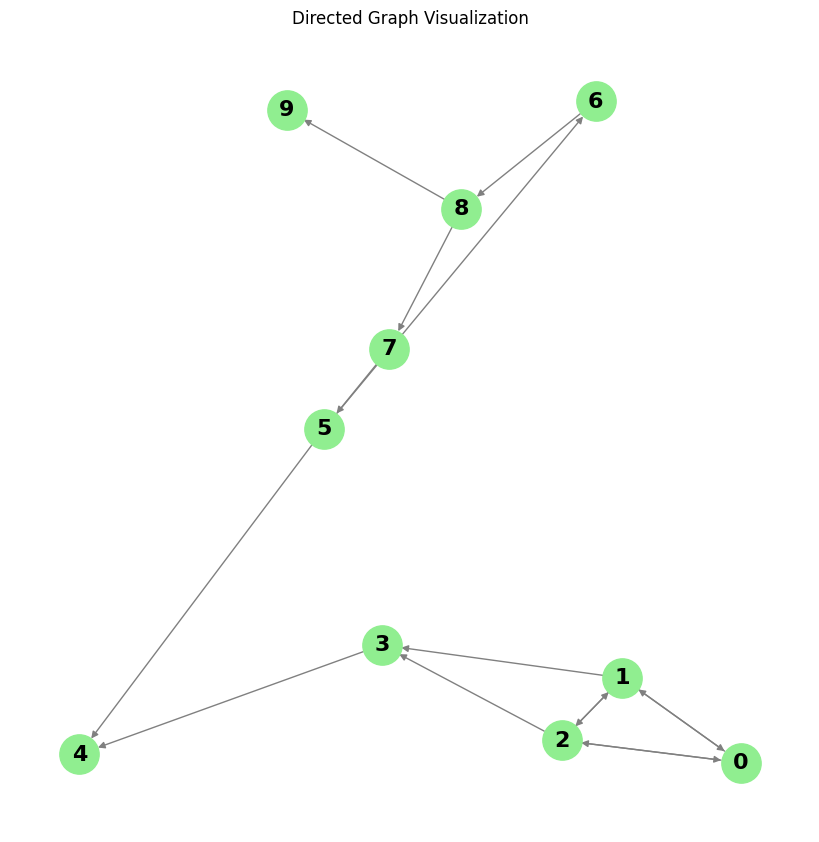

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建有向图
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 使用弹簧布局
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=800, font_size=16, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# 显示图形
plt.title("Directed Graph Visualization")
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


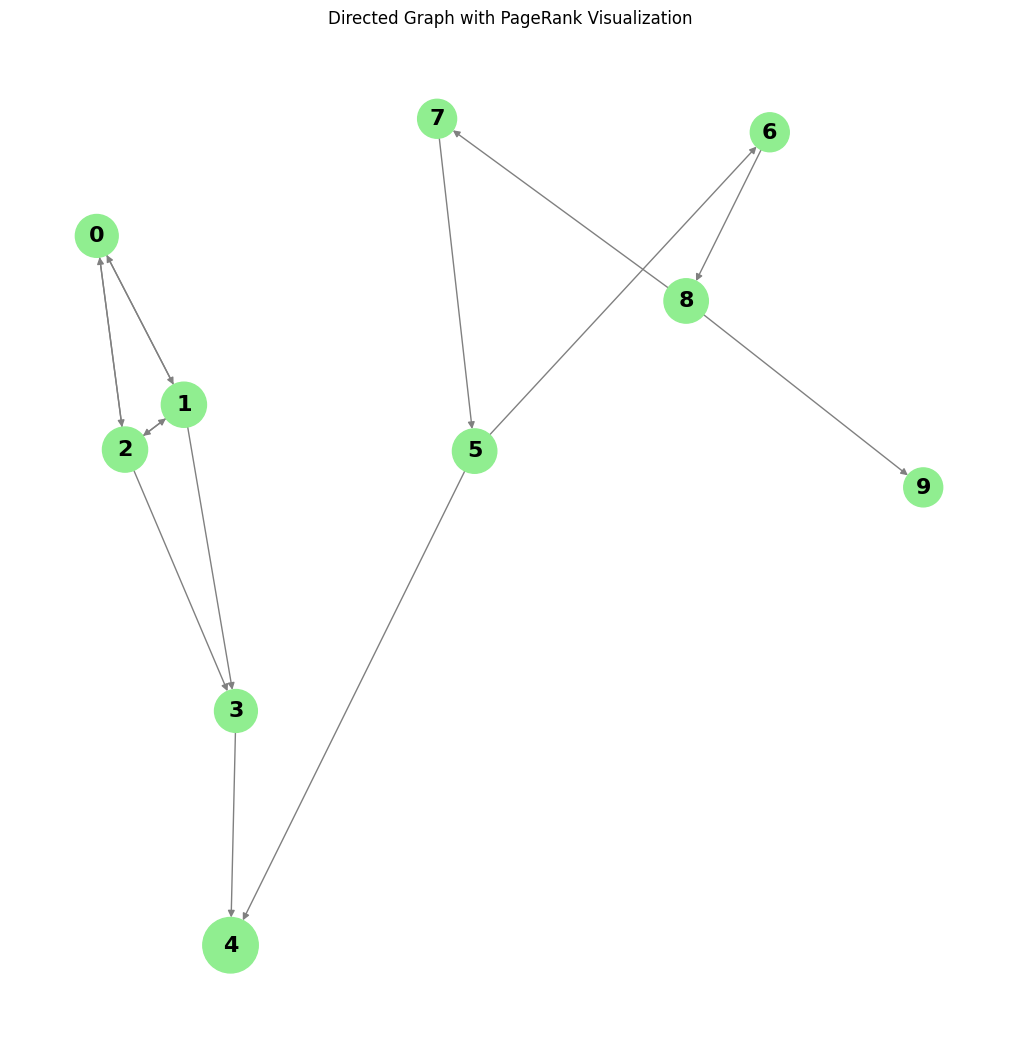

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建有向图
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]
G.add_edges_from(edges)

# 计算 PageRank 值
pagerank_values = nx.pagerank(G)

# 输出每个节点的 PageRank 值
for node, value in pagerank_values.items():
    print(f"Node {node}: PageRank = {value:.4f}")

# 绘制图形
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # 使用弹簧布局

# 根据 PageRank 值调整节点大小
node_sizes = [v * 10000 for v in pagerank_values.values()]  # 放大以便可视化
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=node_sizes,
        font_size=16, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# 显示图形
plt.title("Directed Graph with PageRank Visualization")
plt.show()